# Exploring the data.seattle.gov API
The API for data.seattle.gov is called the SODA API (for "Socrata Open Data API"). This API allows you to do a lot of filtering and selecting your data before you download it. Not all APIs offer this kind of expanded 'query' functionality, but it can be very useful when they do, for at least 2 reasons:

1. it is often easier to select and filter the data you want with an API query than by using Python loops and conditional statements.
2. it allows you to download only a subset of the dataset. If the dataset is very large this can save space on your computer and speed up your code (because Python doesn't have to loop through so many rows every time you perform an operation).

In this notebook, we will walk through a couple of examples of different kinds of API queries you can do with the data.seattle.gov API. If you are interested in getting more practice with this API, you can check out [the API docs here](https://dev.socrata.com/). 

# Step 1: test the API (do this first)
Run the code in the cell below. You should a list with one large dictionary inside it, which contains a bunch of information about the fancy new [Bill and Melinda Gates Computer Science building](https://www.engr.washington.edu/about/bldgs/cse2).

In [1]:
import requests
from pprint import pprint

# save the API endpoint. This is the base URL for all API requests for the building permit dataset
test_endpoint = "https://data.seattle.gov/resource/76t5-zqzr.json?"

#specify some parameters (filtering the data so we only get the parts we want)
test_params = "$where=(PermitNum='6531736-PH')"

test_url = test_endpoint + test_params

test_request = requests.get(test_url)
test_data = test_request.json()

pprint(test_url)
pprint(test_data)

"https://data.seattle.gov/resource/76t5-zqzr.json?$where=(PermitNum='6531736-PH')"
[{'applieddate': '2016-10-07',
  'contractorcompanyname': 'M A MORTENSON COMPANY',
  'description': 'Construct institutional building (University of Washington, '
                 'Computer Science and Engineering Dept.), occupy per plan.',
  'estprojectcost': '23886804.0000',
  'expiresdate': '2020-04-03',
  'housingunitsadded': '0.0',
  'housingunitsremoved': '0.0',
  'issueddate': '2017-04-03',
  'latitude': '47.65300378',
  'link': {'url': 'https://cosaccela.seattle.gov/portal/customize/LinkToRecord.aspx?altId=6531736-PH'},
  'location1': {'latitude': '47.65300378', 'longitude': '-122.30500427'},
  'longitude': '-122.30500427',
  'originaladdress1': '3800 EAST STEVENS WAY NE',
  'originalcity': 'SEATTLE',
  'originalstate': 'WA',
  'originalzip': '98195',
  'permitclass': 'Institutional',
  'permitclassmapped': 'Non-Residential',
  'permitnum': '6531736-PH',
  'permittypedesc': 'New',
  'permittypema

## What just happened?
You just made an APi request (or "query") to data.seattle.gov, and requested a single item (or "row") from the [dataset of Seattle building permits](https://data.seattle.gov/Permitting/Building-Permits/76t5-zqzr). You should click on this link to see what this looks like at their web portal - how they present the data for "public consumption". This dataset contains information about 135,000 proposed and completed building projects within the city of Seattle, going back at least a decade.

In this case, we specified in our API request that we wanted data on a single building, using the parameter ("filtering criteria") ``$where=(PermitNum='6531736-PH')``. Since each row in this dataset has a unique permit number, we were able to retrieve a single record from the entire dataset.

## Using more complex parameters in your API query
In most cases where you are gathering data from an API you will want to retrieve more than one item, and/or you won't know the unique id for the record(s) you want to retrieve. 

In these cases, you can use multiple parameters in combination to grab a set of rows from the dataset that share some characteristics.

Some useful parameters are:
- ``select``: which columns from the dataset you want to get for each item or row
- ``where``: specific values for a column that you want (or don't want)
- ``order``: sort by one of the columns in the output, e.g. start with the most recently issued permits
- ``limit``: the maximum number of many rows you want to get


### Finding column and value names in a dataset
In many cases where you want to download data from a website via an API, you won't be able to see what the data looks like (its structure and its content) before you start querying. Fortunately, data.seattle.gov has [a spreadsheet-like interface](https://data.seattle.gov/Permitting/Building-Permits/76t5-zqzr/data) for each dataset, where you can preview the data and see the names of all of the columns. This makes it easier for us to decide how to build our query.

## Creating a more complex API query

For example, anyone who lives in central Seattle knows that there have been a LOT of new apartment and condo buildings going up over the past decade! Let's say we wanted to track the rate of apartment building creation in Seattle over time, to see if the rate really has increased.

Using a combination of different parameters in a single query, we can filter the building permit dataset and retrieve only the records we want.

When doing a complex query like this, it is often useful to write it out for yourself in human language first, and then translate that into API parameters (the language that the computer reads).

"Give me basic information for the 1000 most recently completed new single and multifamily dwellings built in Seattle since 2006"

This query would look like this (paste it into your browser to try it out!):
``https://data.seattle.gov/resource/76t5-zqzr.json?$select=PermitNum, PermitClass, CompletedDate, Description&$where=(PermitClass='Multifamily' OR PermitClass='Single Family/Duplex') AND PermitTypeDesc='New' AND CompletedDate > '2006-01-01'&$order=CompletedDate DESC&$limit=1000``

As you can see, these URLs can get long and complicated! So it is often easier to send these complex queries using the ``params`` argument of the ``requests`` library. This allows you to organize these sub-components fo the query into a dictionary, where the keys are the parameters and the values are the filtering criteria.

In [2]:
bp_api_params = {
"$select" : "PermitNum, PermitClass, CompletedDate, Description",
"$where" : "(PermitClass='Multifamily' OR PermitClass='Single Family/Duplex') AND PermitTypeDesc='New' AND CompletedDate > '2006-01-01'",
"$order" : "CompletedDate DESC",
"$limit" : "1000",
}

Then you can pass this dictionary, along with the endpoint (see the first cell above) into the request.

In [3]:
bp_endpoint = "https://data.seattle.gov/resource/76t5-zqzr.json?"

bp_request = requests.get(bp_endpoint, params=bp_api_params)
bp_data = bp_request.json()

pprint(bp_request.url) #you can still print out the full URL you sent to the API, to help debug
pprint(bp_data[:5])#print out the first 5 items to check our work

'https://data.seattle.gov/resource/76t5-zqzr.json?%24select=PermitNum%2C+PermitClass%2C+CompletedDate%2C+Description&%24where=%28PermitClass%3D%27Multifamily%27+OR+PermitClass%3D%27Single+Family%2FDuplex%27%29+AND+PermitTypeDesc%3D%27New%27+AND+CompletedDate+%3E+%272006-01-01%27&%24order=CompletedDate+DESC&%24limit=1000'
[{'CompletedDate': '2021-04-09',
  'Description': 'Construct north bldg. 1, per plan (Establish use as '
                 'townhouses and construct 2 two-family dwellings and '
                 'associated site work, per plans. Reviews and processing for '
                 "2 C/N's under 6675024-CN)",
  'PermitClass': 'Single Family/Duplex',
  'PermitNum': '6675024-CN'},
 {'CompletedDate': '2021-04-08',
  'Description': 'Establish use as and construct single family residence, per '
                 'standard plan 6768368-SP.',
  'PermitClass': 'Single Family/Duplex',
  'PermitNum': '6771507-CN'},
 {'CompletedDate': '2021-04-08',
  'Description': 'Establish use as and c

## Saving to CSV
Now that you have the data you want stored in the list-of-dictionaries called ``bp_data``, you can start to work with it in Python! Or, if you just want to save this data file and work on it in a spreadsheet, you can save it directly to CSV at this point.

In [4]:
import csv

#read through the list-of-dicts line by line and write it to CSV    
with open('1000_most_recent_residential_permits.csv', 'w', encoding='utf-8') as csv_outfile:
    writer = csv.writer(csv_outfile)

    #first write the titles that will appear at the head of each column in the CSV
    writer.writerow(('permit number', 'description', 'building type', 'completed date'))
    
    for b in bp_data:

        #write the data for each permit application onto a single row in the CSV 
        writer.writerow((b['PermitNum'], b['Description'], b['PermitClass'], b['CompletedDate']))

## A note on messy data
The data in this dataset is messy and incomplete! Some of the rows in this dataset will be missing values for fields (like "Original Zipcode" and "HousingUnitsAdded" to name a few). You may find that this leads to errors when you are trying to analyze or export the data. 

In general, dealing with messy, inconsistent, incomplete data is the MOST TIME CONSUMING (and frustrating!) part of doing data science. If you are trying to write your own query and you are getting errors that you suspect may be due to missing or messy data, call a mentor over and we can work with you to try to debug this.

## Challenge Question

What to do
- Create three novel queries of your own design in three separate code cells below. All you need to do is to alter the query parameters to return different results. Try out different kinds of queries and see what you can get from the database. 
- Make sure to create a Markdown Cell between each of your new queries that describes what you are doing.
- Save your work.

I've started the cells for you:

## Example 1

I wanted to find out how the construction of duplexes has changed over time versus single-family homes.

This query is for all permits in the single family/duplex and multifamily categories (because sometimes duplex permits end up under multifamily). Permits are then filtered by description:
* Query ensures the description contains the keywords "new" or "construct"
* If the description contains "sfr" or "single family" after "new" or "construct", count as construction of a new single family residence
* If the description contains "duplex" after "new" or "construct", count as construction of a new duplex

In [5]:
import pandas as pd

query_limit = 1000

# Single family query
bp_api_params = {
"$select" : "PermitNum, PermitClass, AppliedDate, CompletedDate, Description",
"$where" : ("(PermitClass='Multifamily' OR PermitClass='Single Family/Duplex') "
            "AND PermitTypeDesc='New' AND CompletedDate > '2006-01-01' "
            "AND NOT lower(Description) like '%alteration%' AND NOT lower(Description) like '%existing%' "
            "AND (lower(Description) like '%new%sfr' OR lower(Description) like '%construct%sfr' "
                  "OR lower(Description) like '%new single family%' OR lower(Description) like '%construct%single family%')"
           ),
"$order" : "AppliedDate DESC",
"$limit" : query_limit
}

bp_data = []
try:
    # We want to get as much data as they have, not just the first 1000 rows. To do that, keep
    # repeating the request with an increasing "$offset" parameter until fewer than 1000 rows
    # are returned.
    while True:
        bp_api_params['$offset'] = len(bp_data)
        bp_request = requests.get(bp_endpoint, params=bp_api_params)
        new_data = bp_request.json()
        bp_data += new_data
        if len(new_data) < query_limit:
            break

    # For debugging
    #pprint(bp_api_params["$where"])
    #pprint(bp_request.url) #you can still print out the full URL you sent to the API, to help debug

    df_sfr = pd.DataFrame(bp_data)
    df_sfr["AppliedDate"] = pd.to_datetime(df_sfr["AppliedDate"])
except TypeError as e:
    pprint(bp_data)
    
df_sfr.head()

,PermitNum,PermitClass,AppliedDate,CompletedDate,Description
0,6772948-CN,Single Family/Duplex,2020-02-28,2021-02-10,Establish use as and construct new single fami...
1,6771507-CN,Single Family/Duplex,2020-02-25,2021-04-08,Establish use as and construct single family r...
2,6754329-CN,Single Family/Duplex,2020-01-07,2021-01-20,Establish use as and construct new single fami...
3,6763539-CN,Single Family/Duplex,2019-12-18,2021-03-30,"Construct Middle duplex, per plan (Establish u..."
4,6756865-CN,Single Family/Duplex,2019-12-18,2021-03-30,"Construct South Single family residence, per p..."


Save the data

In [6]:
df_sfr.to_csv("seattle_new_sfrs.csv")

## Example 2

Now, query for the duplexes. This one is a bit simpler.

In [7]:
bp_api_params['$where'] = ("(PermitClass='Multifamily' OR PermitClass='Single Family/Duplex') "
                           "AND PermitTypeDesc='New' AND CompletedDate > '2006-01-01' "
                           "AND NOT lower(Description) like '%alteration%' AND NOT lower(Description) like '%existing%' "
                           "AND (lower(Description) like '%new%duplex%' OR lower(Description) like '%construct%duplex%')"
                          )

bp_data = []
try:
    while True:
        bp_api_params['$offset'] = len(bp_data)
        bp_request = requests.get(bp_endpoint, params=bp_api_params)
        new_data = bp_request.json()
        bp_data += new_data
        if len(new_data) < query_limit:
            break

    #pprint(bp_api_params["$where"])
    #pprint(bp_request.url) #you can still print out the full URL you sent to the API, to help debug

    df_duplex = pd.DataFrame(bp_data)
    df_duplex["AppliedDate"] = pd.to_datetime(df_duplex["AppliedDate"])
except TypeError as e:
    pprint(bp_data)
    
df_duplex.head()

,PermitNum,PermitClass,AppliedDate,CompletedDate,Description
0,6763540-CN,Single Family/Duplex,2019-12-18,2021-03-30,"Construct North Single family residence, per p..."
1,6756865-CN,Single Family/Duplex,2019-12-18,2021-03-30,"Construct South Single family residence, per p..."
2,6763539-CN,Single Family/Duplex,2019-12-18,2021-03-30,"Construct Middle duplex, per plan (Establish u..."
3,6747064-CN,Multifamily,2019-09-07,2021-01-19,"Construct East townhouse building B, per plan...."
4,6744045-CN,Multifamily,2019-08-19,2021-01-27,Construct north building (Establish use as tow...


Save the data

In [8]:
df_duplex.to_csv("seattle_new_duplexes.csv")

Generate a plot to compare SFR and Duplex construction

[Text(0, 0.5, 'New applications per month'),
 Text(0.5, 1.0, 'Seattle Building Permits for New Construction of Single Family vs Duplexes')]

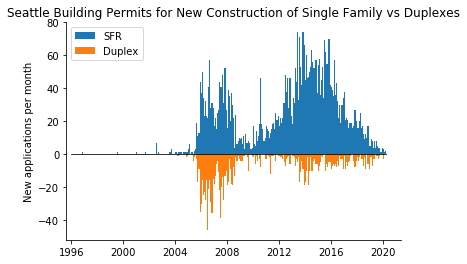

In [9]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
sfr_counts_by_month = df_sfr.set_index("AppliedDate").groupby(pd.Grouper(freq="M")).size()
duplex_counts_by_month = df_duplex.set_index("AppliedDate").groupby(pd.Grouper(freq="M")).size()

fig, ax = plt.subplots()
ax.bar(sfr_counts_by_month.index, sfr_counts_by_month, width=pd.Timedelta(31, 'day'), label="SFR")
ax.bar(duplex_counts_by_month.index, -duplex_counts_by_month, width=pd.Timedelta(31, 'day'), label="Duplex")
# Adapted from https://matplotlib.org/stable/gallery/ticks_and_spines/spine_placement_demo.html#sphx-glr-gallery-ticks-and-spines-spine-placement-demo-py
ax.spines['top'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.legend()
ax.set(ylabel="New applications per month", title="Seattle Building Permits for New Construction of Single Family vs Duplexes")

Wow, duplex permitting doesn't seem to have recovered since the housing market collapse.

## Example 3

How many ADU applications were there? Perhaps ADUs have become more popular and replaced duplex construction.

In [10]:
bp_api_params['$where'] = ("(PermitClass='Multifamily' OR PermitClass='Single Family/Duplex') "
                           "AND PermitTypeDesc='New' AND CompletedDate > '2006-01-01' "
                           "AND NOT lower(Description) like '%alteration%' AND NOT lower(Description) like '%existing%' "
                           "AND (lower(Description) like '%new%accessory dwelling%' OR lower(Description) like '%construct%accessory dwelling%')"
                          )

bp_data = []
try:
    while True:
        bp_api_params['$offset'] = len(bp_data)
        bp_request = requests.get(bp_endpoint, params=bp_api_params)
        new_data = bp_request.json()
        bp_data += new_data
        if len(new_data) < query_limit:
            break

    #pprint(bp_api_params["$where"])
    #pprint(bp_request.url) #you can still print out the full URL you sent to the API, to help debug

    df_adu = pd.DataFrame(bp_data)
    df_adu["AppliedDate"] = pd.to_datetime(df_duplex["AppliedDate"])
except TypeError as e:
    pprint(bp_data)
    
df_adu.head()

,PermitNum,PermitClass,AppliedDate,CompletedDate,Description
0,6744525-CN,Single Family/Duplex,2019-12-18,2021-02-05,Construct terraced garage with detached access...
1,6756859-CN,Single Family/Duplex,2019-12-18,2021-01-19,Establish use as and construct new single fami...
2,6753091-CN,Single Family/Duplex,2019-12-18,2021-01-21,Establish use as and construct a new single fa...
3,6731203-CN,Single Family/Duplex,2019-09-07,2021-03-09,Establish use as and construct single family r...
4,6721878-CN,Single Family/Duplex,2019-08-19,2021-02-03,Establish use as and construct single family r...


Save the data

In [11]:
df_adu.to_csv("seattle_new_adus.csv")

Update the plot from above by adding the duplex and ADU applications together to compare against SFRs

[Text(0, 0.5, 'New applications per month'),
 Text(0.5, 1.0, 'Seattle Building Permits for New Construction of Single Family vs Duplexes and ADUs')]

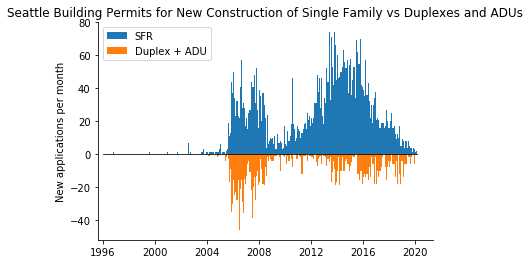

In [12]:
# See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.add.html
adu_dupl_counts_by_month = duplex_counts_by_month.add(df_adu.set_index("AppliedDate").groupby(pd.Grouper(freq="M")).size(), fill_value=0)

fig, ax = plt.subplots()
ax.bar(sfr_counts_by_month.index, sfr_counts_by_month, width=pd.Timedelta(31, 'day'), label="SFR")
ax.bar(adu_dupl_counts_by_month.index, -adu_dupl_counts_by_month, width=pd.Timedelta(31, 'day'), label="Duplex + ADU")
# Adapted from https://matplotlib.org/stable/gallery/ticks_and_spines/spine_placement_demo.html#sphx-glr-gallery-ticks-and-spines-spine-placement-demo-py
ax.spines['top'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.legend()
ax.set(ylabel="New applications per month", title="Seattle Building Permits for New Construction of Single Family vs Duplexes and ADUs")

That slightly improves the ratio but not enough.